<a href="https://colab.research.google.com/github/sykathowlader/group6_introToAi/blob/main/K_NNFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error , accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import math


url = "https://sykathowlader.github.io/visualization_data/diabetes.csv"

df1 = pd.read_csv(url)
# Dataset is now stored in a Pandas Dataframe
df1.head()


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
X = df1.iloc[: ,1:22]
X

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [ ]:
y = df1.iloc[:,0]
y

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
253675    0.0
253676    2.0
253677    0.0
253678    0.0
253679    2.0
Name: Diabetes_012, Length: 253680, dtype: float64

In [ ]:
# Assuming the correct column name is 'Diabetes_012'
y = df1['Diabetes_012']
X = df1.drop('Diabetes_012', axis=1)

# Scale the features
scaler = StandardScaler()
numerical_columns = X.select_dtypes(include=[np.number]).columns
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the k-NN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=12)

# Train the k-NN model
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Test accuracy: {accuracy:.3f}')

Test accuracy: 0.842


In [ ]:
# Create and fit a nearest-neighbor classifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Print predictions and target values
print("Predictions from the classifier:")
print(knn.predict(X_test))
print("Target values:")
print(y_test)

Predictions from the classifier:
[0. 0. 0. ... 0. 0. 0.]
Target values:
219620    0.0
132821    0.0
151862    0.0
139717    0.0
239235    0.0
         ... 
169513    2.0
182415    0.0
109739    0.0
181671    0.0
202118    0.0
Name: Diabetes_012, Length: 50736, dtype: float64


In [ ]:
y_pred=knn.predict(X_test)

print('Training set score: {:.4f}'.format(knn.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(knn.score(X_test, y_test)))

Training set score: 0.8697
Test set score: 0.8303


In [ ]:
#check MSE & RMSE
mse = mean_squared_error (y_test, y_pred)
print('Mean Squared Error : '+ str(mse))
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error : '+ str(rmse))

Mean Squared Error : 0.6208806370230211
Root Mean Squared Error : 0.7879597940396585


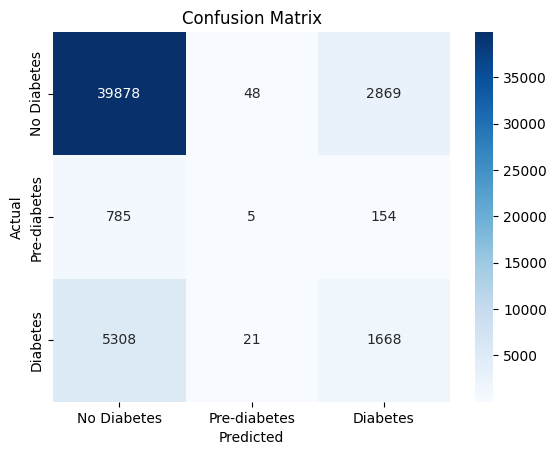

In [ ]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display confusion matrix with axis labels
labels = ['No Diabetes', 'Pre-diabetes', 'Diabetes']
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
test_scores = []
train_scores = []

for i in range(1,20):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)

    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [ ]:
print(train_scores)
print(test_scores)

[0.9927017164481686, 0.8886673874847952, 0.8861332612515205, 0.8706187773122493, 0.8689631481731765, 0.8628474568635401, 0.8622674235257016, 0.859080055863405, 0.8588716943731135, 0.8568274992116052, 0.8567373969455332, 0.8553013920800108, 0.8552338153804568, 0.8539554894805604, 0.8542089021038879, 0.853330405009686, 0.853195251610578, 0.8528179483714016, 0.8527503716718475]
[0.7795385262272679, 0.8303899926416483, 0.8218621885840429, 0.836171554714601, 0.8323084200567644, 0.8383265005781562, 0.8371307684221592, 0.8399427099758225, 0.8397981709239988, 0.8415589193734889, 0.8410727425628088, 0.842281614632608, 0.8421502154945864, 0.842675812046673, 0.8424655734258383, 0.8432802480815725, 0.8433328077367812, 0.8436613055818354, 0.8442000420477241]


In [ ]:
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max train score 99.27017164481686 % and k = [1]
Max test score 84.42000420477241 % and k = [19]


<Axes: >

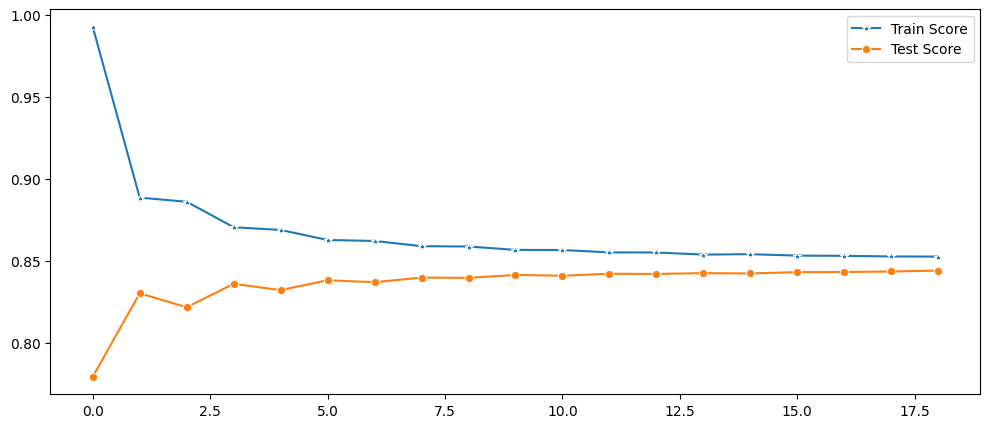

In [ ]:
plt.figure(figsize=(12,5))
sns.lineplot(train_scores,marker='*',label='Train Score')
sns.lineplot(test_scores,marker='o',label='Test Score')

In [ ]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(16)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.8430897193314412

Text(0.5, 23.52222222222222, 'Predicted label')

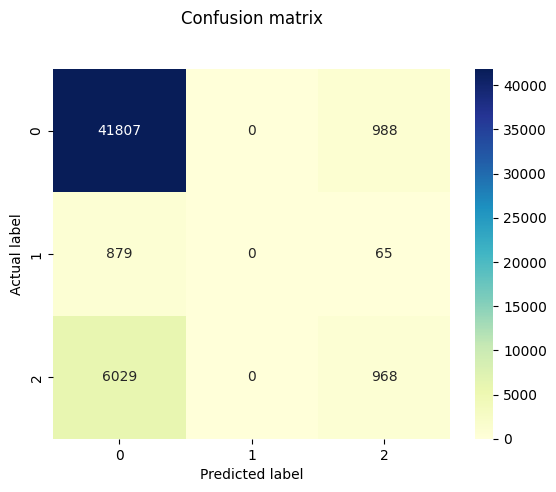

In [ ]:
y_predic = knn.predict(X_test)
cm = confusion_matrix(y_test, y_predic)
sns.heatmap(cm, annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print(classification_report(y_test, y_predic))

              precision    recall  f1-score   support

         0.0       0.86      0.98      0.91     42795
         1.0       0.00      0.00      0.00       944
         2.0       0.48      0.14      0.21      6997

    accuracy                           0.84     50736
   macro avg       0.45      0.37      0.38     50736
weighted avg       0.79      0.84      0.80     50736



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


I will now check and compare my results with the second dataset

In [ ]:
url = "https://sykathowlader.github.io/visualization_data/diabetes2.csv"

#Store the dataset into a pandas DataFrame
df2 = pd.read_csv(url)

print(df2['Diabetes_binary'].unique())
df2.head()

[0. 1.]


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
# Assuming the correct column name is 'Diabetes_012'
y2 = df2['Diabetes_binary']
X2 = df2.drop('Diabetes_binary', axis=1)

# Scale the features
scaler = StandardScaler()
numerical_columns = X2.select_dtypes(include=[np.number]).columns
X2[numerical_columns] = scaler.fit_transform(X2[numerical_columns])

# Split the dataset into training and testing sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the k-NN classifier
knn_classifier2 = KNeighborsClassifier(n_neighbors=12)

# Train the k-NN model
knn_classifier2.fit(X_train2, y_train2)

# Make predictions on the test set
y_pred2 = knn_classifier2.predict(X_test2)

# Evaluate the model
accuracy2 = accuracy_score(y_test2, y_pred2)
print(f'Test accuracy: {accuracy2:.3f}')


Test accuracy: 0.837


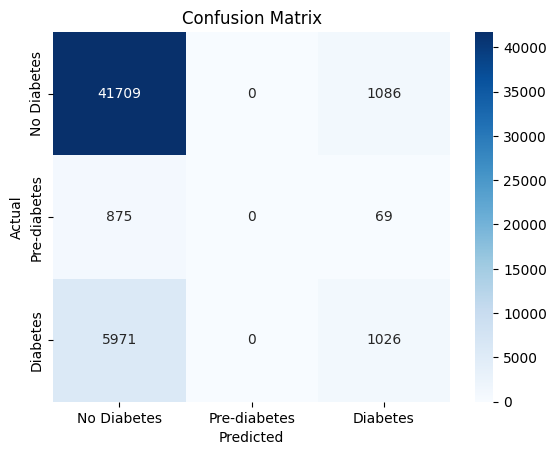

In [ ]:
# Generate confusion matrix
conf_matrix2 = confusion_matrix(y_test2, y_pred2)

# Display confusion matrix with axis labels
labels2 = ['No Diabetes', 'Pre-diabetes', 'Diabetes']
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Blues', xticklabels=labels2, yticklabels=labels2)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

The second data set does have a lower accuracy hence it providing a confusion matrix with a much higher volume of people with no diabetes pre diabetes and diabetes

I shall test 3rd dataset


In [ ]:
url = "https://sykathowlader.github.io/visualization_data/diabetes50_50.csv"

#Store the dataset into a pandas DataFrame
df3 = pd.read_csv(url)
df3.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [ ]:
# Assuming the correct column name is 'Diabetes_012'
y3 = df3['Diabetes_binary']
X3 = df3.drop('Diabetes_binary', axis=1)

# Scale the features
scaler3 = StandardScaler()
numerical_columns3 = X3.select_dtypes(include=[np.number]).columns
X3[numerical_columns3] = scaler3.fit_transform(X3[numerical_columns3])

# Split the dataset into training and testing sets
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=42)

# Initialize the k-NN classifier
knn_classifier3 = KNeighborsClassifier(n_neighbors=12)

# Train the k-NN model
knn_classifier3.fit(X_train3, y_train3)

# Make predictions on the test set
y_pred3 = knn_classifier3.predict(X_test3)

# Evaluate the model
accuracy3 = accuracy_score(y_test3, y_pred3)
print(f'Test accuracy: {accuracy3:.3f}')

Test accuracy: 0.725


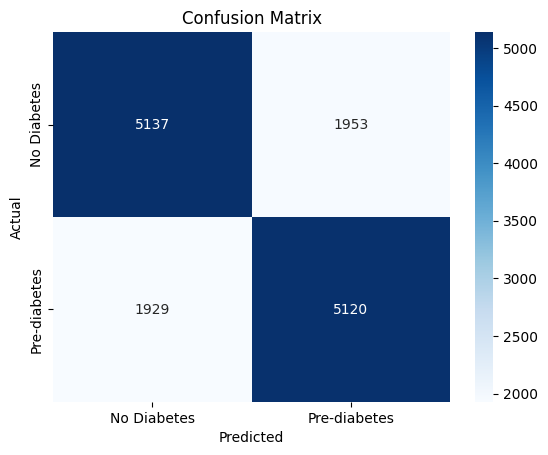

In [ ]:
# Generate confusion matrix
conf_matrix3 = confusion_matrix(y_test3, y_pred3)

# Display confusion matrix with axis labels
labels3 = ['No Diabetes', 'Pre-diabetes']
sns.heatmap(conf_matrix3, annot=True, fmt='d', cmap='Blues', xticklabels=labels3, yticklabels=labels3)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()